1. Know what the Scikit-learn library is and how it is used for model training
2. Know what is supervised and unsupervised training
2. Be able to use the Scikit-learn library to train a linear regression data model
3. Be able to minimally analyze the accuracy of the trained data model
4. Know what is dependend and independent variable
5. Know how to predict outcome based on a new input value.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd

advertising = pd.read_csv('/content/tvmarketing.csv')
advertising.head() #first 5 rows
# TV - advertising budget spent on TV marketing
# Sales - how much we have sold (revenue, income)

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [3]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


# Regression plot

<Axes: xlabel='TV', ylabel='Sales'>

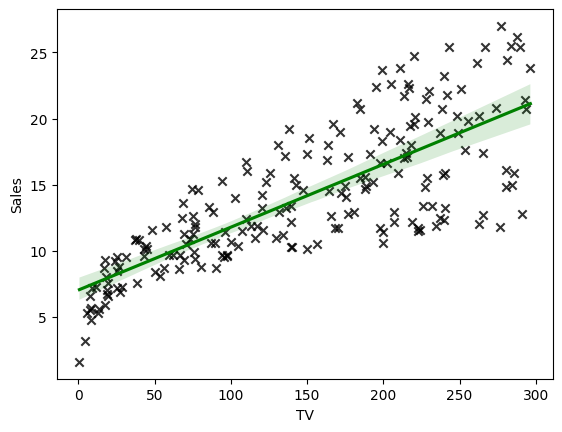

In [5]:
import seaborn as sns
sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))

In [6]:
# Calculate the person correlation koefficient

advertising.corr() #Calculate correlation for the whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [7]:
advertising['TV'].corr(advertising['Sales'])
# in a result we see positive, strong correlation
# with increasing budget, sales increases. 0.78 of sales amount is explained by advertising budget

0.7822244248616061

# Supervised VS unsupervised
### Supervised learning:
The model learns from labeled data, where each input has a corresponding correct output. The goal is to predict the output for new, unseen data.
### Unsupervised learning:
The model learns from unlabeled data, discovering patterns or structures without specific output labels. It groups or organizes data based on similarities.
### Semi-supervised learning
combines elements of both supervised and unsupervised learning. The model is trained on a small amount of labeled data and a larger amount of unlabeled data. It uses the labeled data to guide the learning process and improve the accuracy of predictions on the unlabeled data.

![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

# Training linear regression model
https://scikit-learn.org/stable/

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [9]:
# Data preparation x and y

X = advertising.drop('Sales', axis=1) #independend variable
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [10]:
Y = advertising.drop('TV', axis=1) #the outcome, dependent
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


# Train/Test sets
Shows how good is a model to predict data

![jupyter.png](link to the pict) - to add a pict

![jupyter.png](https://www.jcchouinard.com/wp-content/uploads/2023/06/Validation-on-Training-and-Testing-Sets-1024x437.png)


In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state = 42)
#0.7 means 70% of the data should be used for training
#random_state = 42 means evry time update code we'll see the same 42 random rows


In [15]:
X_train

,TV
45,175.1
68,237.4
137,273.7
199,232.1
190,39.5
...,...
149,44.7
72,26.8
177,170.2
122,224.0


###Train the model

In [18]:
# Column - feature
# Row - observation

from sklearn.linear_model import LinearRegression # import the model
model = LinearRegression() #Initailize the model
model.fit(X_train, y_train) #Fit the model

LinearRegression()

In [20]:
### Y = mX + b ###

print(f'Model intercept is: {model.intercept_}')
print(f'Model coefficient is: {model.coef_}')

Model intercept is: [7.5285003]
Model coefficient is: [[0.04582846]]


# A prediction

In [28]:
my_new_budget = [[50]]#[[]] as for 2DArray dataset
my_predict_sales = model.predict(my_new_budget)
print(f'When the new dudget is {my_new_budget[0][0]} then predicted sales are {round(my_predict_sales[0][0])}')

When the new dudget is 50 then predicted sales are 10


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
X_test.head()

,TV
28,248.8
9,199.8
5,8.7
189,18.7
98,289.7


In [30]:
y_pred = model.predict(X_test)

In [33]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred
final_df.head()

,TV,Actual_sales,Predicted_sales
28,248.8,18.9,18.930622
9,199.8,10.6,16.685028
5,8.7,7.2,7.927208
189,18.7,6.7,8.385493
98,289.7,25.4,20.805007


In [34]:
final_df['ABSOLUTE_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales'] - final_df['Predicted_sales'])
final_df.head()

,TV,Actual_sales,Predicted_sales,ABSOLUTE_Error_Actual_vs_Predicted
28,248.8,18.9,18.930622,0.030622
9,199.8,10.6,16.685028,6.085028
5,8.7,7.2,7.927208,0.727208
189,18.7,6.7,8.385493,1.685493
98,289.7,25.4,20.805007,4.594993
